# Ortogonalni polinomi


Neka je 

$$
L(x_0,x_1,\ldots,x_n)
$$

(pot)prostor razapet linearno nezavisnim vektorima (ili funkcijama) $x_0,x_1,\ldots,x_n$.

Radi se o skupu svih linearnih kombinacija zadanih vektora. 

Koristeći _Gram-Schmidtov postupak ortogonalizacije_ možemo izračunati _ortogonalnu bazu_ tog (pot)prostora 

$$
y_0,y_1,\ldots,y_n, 
$$

za koju vrijedi

$$
(y_i,y_j)=0,\quad i\neq j. \tag{1}
$$

Neka je 

\begin{align}
y_0&=x_0\\
y_1&=x_1-\frac{(x_1,y_0)}{(y_0,y_0)}y_0\\
y_2&=x_2-\frac{(x_2,y_0)}{(y_0,y_0)}y_0-\frac{(x_2,y_1)}{(y_1,y_1)}y_1\\
& \vdots \\
y_n&=x_n-\sum_{j=0}^{n-1} \frac{(x_n,y_j)}{(y_j,y_j)}y_j.
\end{align}

Svaki $y_j$ je linearna kombinacija od $x_0,x_1,\ldots,x_j$ pa su $y_j$ linearno nezavisni i vrijedi

$$
L(x_0,x_1,\ldots,x_n)=L(y_0,y_1,\ldots,y_n).
$$

Direktnom provjerom se vidi da vrijedi (1).

_Težinski skalarni produkt_  funkcija $f$ i $g$ na intervalu $[a,b]$ s težinom $\omega(x)>0$ je

$$
(f,g)_\omega=\int_a^b f(x)g(x)\omega(x)\, dx
$$

Funkcije $f$ i $g$ su _ortogonalne_ ako je $(f,g)_\omega=0$.

_Ortogonalni polinomi_ nastaju ortogonalizacijom polinoma

$$
1,x,x^2,x^2,\ldots,x^n. \tag{2}
$$

Različiti odabiri težinske funkcije daju različite sustave ortogonalnih polinoma.  

## Legendreovi polinomi

Ortogonalizirajmo sustav (2) uz

$$
[a,b]=[-1,1], \quad \omega(x)=1,
$$

koristeći paket `SymPy.jl` za simboličko računanje. 

In [1]:
using SymPy

In [2]:
a=-1
b=1
n=8
P=Array{Any,1}(missing,n)
x=Sym("x")
P[1]=x^0
ω(x)=1
for k=2:n
    P[k]=x^(k-1)
    for j=1:k-1
        P[k]=P[k]-integrate(x->x^(k-1)*P[j]*ω(x),a,b)*P[j]/integrate(x->P[j]*P[j]*ω(x),a,b)
    end
end

Julia indeksiranje započima s 1 pa su svi indeksi pomaknuti, odnosno

$$
P_0(x)=P[1], \ P_1(x)=P[2], \ldots
$$

In [3]:
P[1]

1

In [4]:
P[4]

 3   3⋅x
x  - ───
      5 

In [5]:
P[6]

         3      
 5   10⋅x    5⋅x
x  - ───── + ───
       9      21

In [6]:
P[7]

         4      2      
 6   15⋅x    5⋅x     5 
x  - ───── + ──── - ───
       11     11    231

In [7]:
P[8]

         5        3       
 7   21⋅x    105⋅x    35⋅x
x  - ───── + ────── - ────
       13     143     429 

Polinomi $P_n$ su do na množenje konstantom jednaki _Legendreovim_ polinomima

$$
L_n(x)=\frac{1}{2^n n!}\frac{d^n}{dx^n}(x^2-1)^n, \quad n=0,1,2,3,\ldots
$$

In [8]:
n=8
L=Array{Any,1}(missing,n)
L[1]=x^0
for k=1:n-1
    L[k+1]=expand(diff((x^2-1)^k/(2^k*factorial(k)),x,k))
end

In [9]:
L[1], P[1]

(1, 1)

In [10]:
L[2],P[2]

(x, x)

In [11]:
L[4],P[4]

(5*x^3/2 - 3*x/2, x^3 - 3*x/5)

In [12]:
L[7]

     6        4        2     
231⋅x    315⋅x    105⋅x    5 
────── - ────── + ────── - ──
  16       16       16     16

In [13]:
P[7]

         4      2      
 6   15⋅x    5⋅x     5 
x  - ───── + ──── - ───
       11     11    231

In [14]:
L[7]*16/231

         4      2      
 6   15⋅x    5⋅x     5 
x  - ───── + ──── - ───
       11     11    231

Pored ortogonalnosti, vrijede sljedeća svojstva:

* $L_n(x)$  ima $n$ različitih nul-točaka na intervalu $[-1,1]$, 
* vrijedi _tročlana rekurzivna formula_: 

$$ 
L_{n+1}(x)=\frac{2n+1}{n+1}\,x\, L_n(x)-\frac{n}{n+1} L_{n-1}(x).
$$

Izračunajmo polinome numerički i nacrtajmo ih:

In [16]:
using Polynomials
using Interact
using PyPlot

In [17]:
n=40
L=Array{Any,1}(missing,n)
L[1]=Polynomials.Poly([1])
L[2]=Polynomials.Poly([0,1])
for i=3:n
    L[i]=(2*i-3)*L[2]*L[i-1]/(i-1)-(i-2)*L[i-2]/(i-1)
    # @show i, length(L[i])
end

In [18]:
L[7]

Poly(-0.3125 + 6.5625*x^2 - 19.6875*x^4 + 14.4375*x^6)

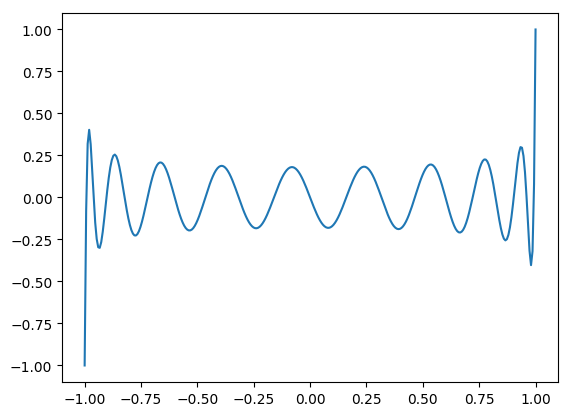

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:k=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
20), Observable{Int64} with 2 listeners. Value:
20, Scope("knockout-component-b0672a41-5bbe-4ce3-b804-b82d50d324d5", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>40,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
20, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/slap/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/slap/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/slap/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/slap/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/slap/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":20}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-b0672a41-5bbe-4ce3-b804-b82d50d324d5\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-b0672a41-5bbe-4ce3-b804-b82d50d324d5\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n

In [19]:
xx=range(-1,stop=1,length=300)
@manipulate for k=1:n
    yy=polyval(L[k],xx)
    plot(xx,yy)
end

## Čebiševljevi polinomi

_Čebiševljevi polinomi_ $T_n(x)$ nastaju ortogonalizacijom sustava (2) uz

$$
[a,b]=[-1,1], \quad \omega(x)=\frac{1}{\sqrt{1-x^2}}.
$$

Čebiševljevi polinomi imaju sljedeća svojstva:

* vrijedi 

$$
T_n(x)=\cos(n\arccos x),\quad n=0,1,2,3,\ldots,
$$

* $T_n(x)$  ima $n$ različitih nul-točaka na intervalu $[-1,1]$, 

$$ 
x_k=\cos \bigg(\frac{2k-1}{n}\frac{\pi}{2} \bigg), \quad k=1,\ldots,n,
$$

* vrijedi _tročlana rekurzivna formula_: 

\begin{align*}
T_0(x)&=1,\\
T_1(x)&=x, \\ 
T_{n+1}(x)&=2\,x\,T_n(x)-T_{n-1}(x),\quad n=1,2,3,\ldots.
\end{align*}
 
__Napomena__:

Rekurzivna formula slijedi iz _adicione formule_

$$
\cos(n+1)\varphi+\cos(n-1)\varphi=2\cos\varphi\cos n\varphi.
$$

Ortogonalnost se dokazuje pomoću supstitucije 

$$
\arccos x=\varphi.
$$

In [20]:
# Simbolički
n=8
T=Array{Any,1}(missing,n)
T[1]=x^0
T[2]=x
for k=2:n-1
    T[k+1]=expand(2*x*T[k]-T[k-1])
end

In [21]:
T[3]

   2    
2⋅x  - 1

In [22]:
T[7]

    6       4       2    
32⋅x  - 48⋅x  + 18⋅x  - 1

In [23]:
T[8]

    7        5       3      
64⋅x  - 112⋅x  + 56⋅x  - 7⋅x

In [24]:
# Numerički
n=50
T=Array{Any,1}(missing,n)
T[1]=Polynomials.Poly([1])
T[2]=Polynomials.Poly([0,1])
for i=3:n
    T[i]=2*T[2]*T[i-1]-T[i-2]
    # @show i, length(T[i])
end

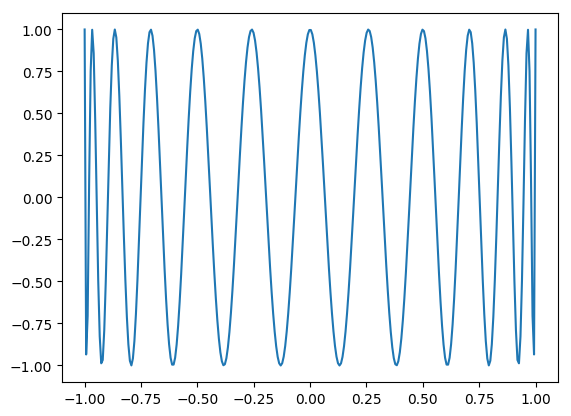

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:k=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
25), Observable{Int64} with 2 listeners. Value:
25, Scope("knockout-component-856b8e0a-bf66-4b8a-bfa3-9d7cfe56bf1b", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>50,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
25, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/slap/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/slap/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/slap/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/slap/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/slap/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":25}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-856b8e0a-bf66-4b8a-bfa3-9d7cfe56bf1b\",\"id\":\"ob_07\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-856b8e0a-bf66-4b8a-bfa3-9d7cfe56bf1b\",\"id\":\"ob_06\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n

In [25]:
xx=range(-1,stop=1,length=300)
@manipulate for k=1:n
    yy=polyval(T[k],xx)
    plot(xx,yy)
end

## Promjena intervala

Ortogonalni sustav funkcija $\Phi_i$ na intervalu $[-1,1]$ pomoću transformacije 

$$
\gamma :[a,b]\to [-1,1],\quad \gamma(x)=\frac{2x}{b-a}-\frac{a+b}{b-a}
$$

prelazi u ortogonalni sustav funkcija na intervalu $[a,b]$

$$
\Psi_i(x)=\Phi_i(\gamma(x)).
$$

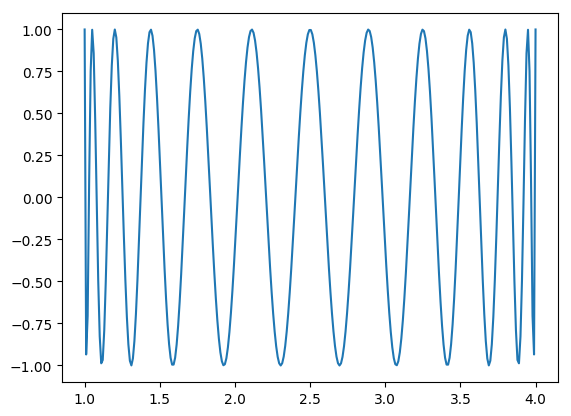

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:k=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
25), Observable{Int64} with 2 listeners. Value:
25, Scope("knockout-component-d4c9f435-1039-413c-a476-0609c38465bf", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>50,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
25, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/slap/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/slap/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/slap/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/slap/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/slap/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":25}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-d4c9f435-1039-413c-a476-0609c38465bf\",\"id\":\"ob_12\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-d4c9f435-1039-413c-a476-0609c38465bf\",\"id\":\"ob_11\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n

In [26]:
a=1
b=4
xx=collect(range(a,stop=b,length=300))
γ=2*xx/(b-a).-(b+a)/(b-a)
@manipulate for k=1:n
    yy=polyval(T[k],γ)
    plot(xx,yy)
end